In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Read the data
df = pd.read_csv('toluca.csv')
df.head()

,lotSize,workHours
0,80,399
1,30,121
2,50,221
3,90,376
4,70,361


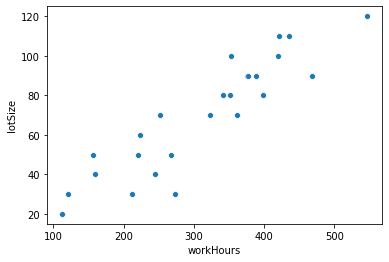

In [14]:
sns.scatterplot(x='workHours', y='lotSize', data=df)

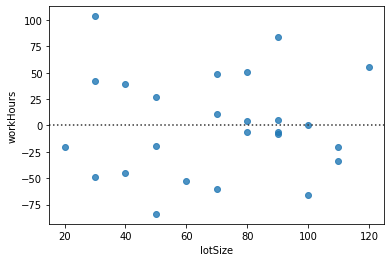

In [21]:
sns.residplot('lotSize', 'workHours', data=df)

#random distribution around the regression line. So good

In [54]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(df[['lotSize']],df[['workHours']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
lin_reg.coef_

array([[3.57020202]])

In [56]:
lin_reg.intercept_

array([62.36585859])

#### workHours can be a good predictor for lotSize using SLR for the line y = 3.57 * x + 62.365

In [3]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [4]:
train_set, test_set = split_train_test(df, 0.2)
print(len(train_set), "train +", len(test_set), "test")

20 train + 5 test


In [27]:
test_labels = test_set.lotSize
train_labels = train_set.lotSize
train_labels.head()

4     70
5     60
1     30
10    40
12    90
Name: lotSize, dtype: int64

In [26]:
test_features = test_set.drop(columns=['lotSize'])
train_features = train_set.drop(columns=['lotSize'])
train_features.head()

,workHours
4,361
5,224
1,121
10,160
12,389


In [58]:
lin_reg = LinearRegression()
lin_reg.fit(train_features, train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
lin_reg.coef_

array([0.22222798])

In [42]:
lin_reg.intercept_

2.020486210979044

In [43]:
test_pred = lin_reg.predict(test_features)

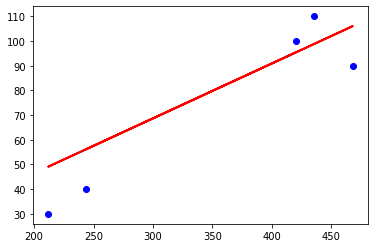

In [50]:
plt.scatter(test_features, test_labels, color='blue')
plt.plot(test_features, test_pred, color='red', linewidth=2)
plt.show()

This graph shows that our alogithm is correct and workHours can be used to predict lotSize 

In [9]:
from sklearn.metrics import mean_squared_error
hypotheses = lin_reg.predict(test_features)
mse = mean_squared_error(test_labels, hypotheses)
print('RMSE:', np.sqrt(mse))

RMSE: 14.395601244126524
